In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
df = pd.read_csv('Telco_Customer_Churn.csv')

#### General Information

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Columns Header

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Check for Missing Values

In [75]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### A Partial Correlation Heatmap

C:\Users\doama\AppData\Local\Temp\ipykernel_10428\968647694.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



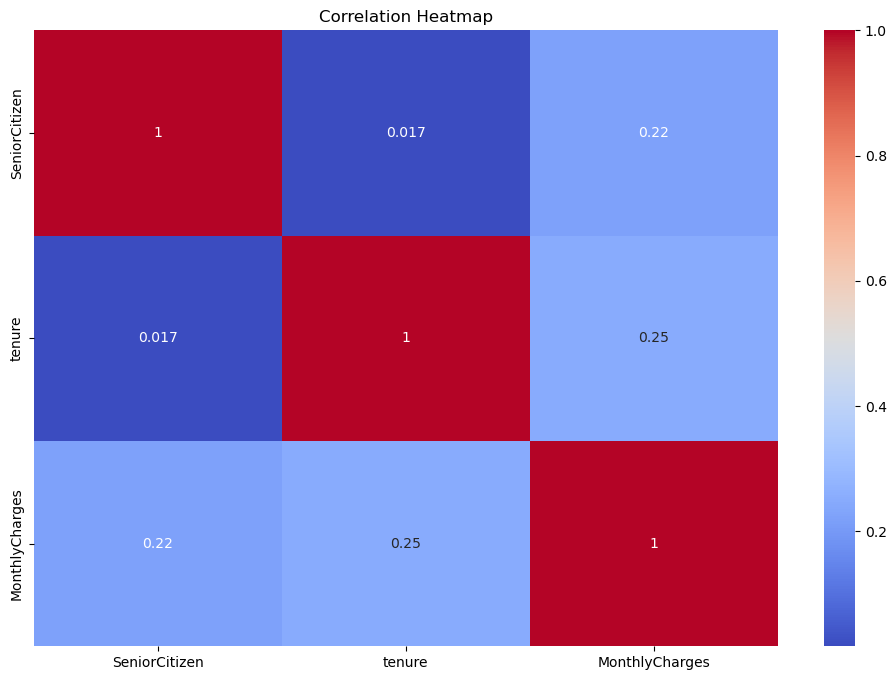

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Converting Categorical Values to Numerical

In [79]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Note that some rows (every row which has anything else besides numbers) became columns. 
Such as "customerID_0003-MKNFE" or "Partner" per example
#### Notice that the column "TotalCharges" has only numbers but it was converted too, wrongly. That might happen because the number has a point to separate the decimals or because the numbers are stored as string or object. Let's check and deal with it

In [80]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

#### Converting to numerical (float) using "to_numeric"

In [81]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

#### Convert Categorical Values to Numerical
##### Notice that the extra columns related to the "ToTalCharges" just disappeared, standing only the original
From 13602 columns it reduces to 7073 columns

In [82]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


#### Data Visualization

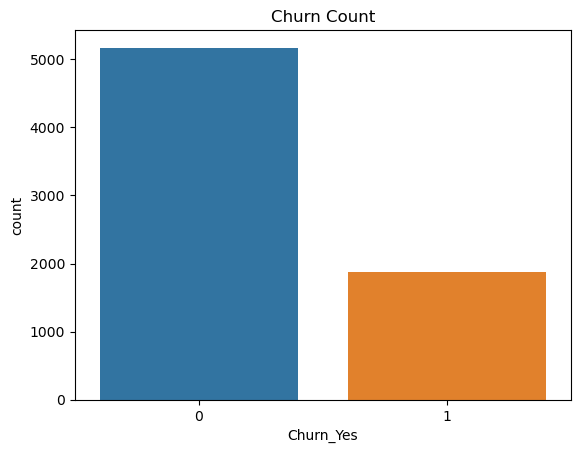

In [83]:
sns.countplot(x='Churn_Yes', data=df)
plt.title('Churn Count')
plt.show()

#####  Number 1 represents the customer who left within last month

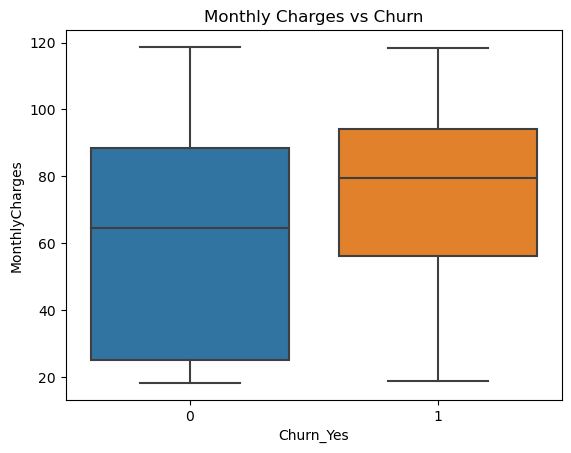

In [84]:
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

##### Higher the Monthly Charges, there are more people unsubscribing and the opposite happen too. The lower the Monthly Charges, there are more people continuing the subscription

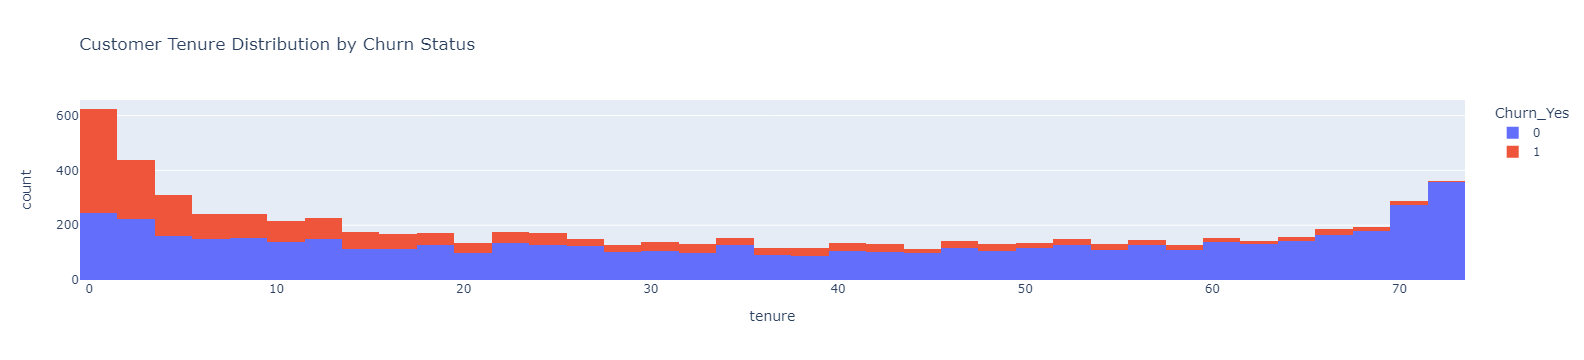

In [85]:
fig = px.histogram(df, x='tenure', color='Churn_Yes', title='Customer Tenure Distribution by Churn Status')
fig.show()

##### We can observe that as tenure decreases, the churn rate increases

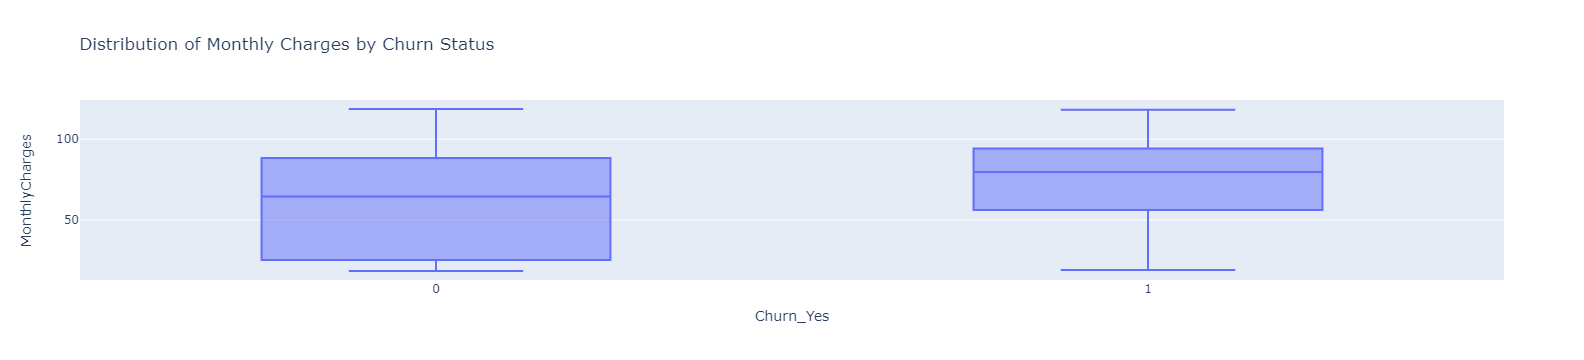

In [86]:
fig = px.box(df, x='Churn_Yes', y='MonthlyCharges', title='Distribution of Monthly Charges by Churn Status')
fig.show()

##### On this graphic we can observe that the range of Monthly Charges from Churn or not overlap partially and the median from both are not that far

#### Checking once again for missing values

In [87]:
print(df.isnull().sum())

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
customerID_0003-MKNFE                     0
                                         ..
PaperlessBilling_Yes                      0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
Churn_Yes                                 0
Length: 7073, dtype: int64


#### Dealing with missing values

In [88]:
df.fillna(df.mean(), inplace=True)

#### Confirming the elimination of missing values

In [89]:
print(df.isnull().sum())

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
customerID_0003-MKNFE                    0
                                        ..
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Churn_Yes                                0
Length: 7073, dtype: int64


##### Checking the DType of each Column

In [90]:
print(df.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
customerID_0003-MKNFE                      uint8
                                          ...   
PaperlessBilling_Yes                       uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
Churn_Yes                                  uint8
Length: 7073, dtype: object


##### Solving the problem of dtype unit8 which is not a number and can't be used in the model

In [91]:
def convert_uint8(column):
    column = np.uint8(column)
    new_column = np.int8(column)
    return new_column

In [92]:
for column in df:
    if (df[column].dtypes) == "uint8":
        df[column] = convert_uint8(df[column])

In [93]:
print(df.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
customerID_0003-MKNFE                       int8
                                          ...   
PaperlessBilling_Yes                        int8
PaymentMethod_Credit card (automatic)       int8
PaymentMethod_Electronic check              int8
PaymentMethod_Mailed check                  int8
Churn_Yes                                   int8
Length: 7073, dtype: object


#### Handling any missing value

In [94]:
df.dropna(inplace=True)

#### THE MODEL
##### Time to split the data into Training and Testing Sets

In [95]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression Model

In [96]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### Making predictions

In [97]:
y_pred = model.predict(X_test)

#### Evaluating the accuracy of the model

In [99]:
print(classification_report(y_test, y_pred))

[[934 102]
 [157 216]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



#### - Zero id related to the negative class (No Churn)
#### - One is related to the positive class

#### Making the Confusion Matrix Friendly

<Axes: >

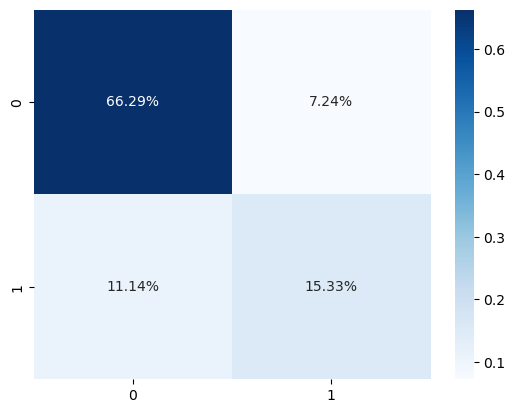

In [104]:
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, fmt='.2%', cmap='Blues')

#### - The top left square represents the True Negatives which means the % of correct in guessing a "No Churn"
#### - The top right square represents the False Positives which means the % of incorrect in guessing "Churn"
#### - The down left square represents the False Negatives which means the % of incorrect in guessing "No Churn"
#### - The down right square represents the True Positives which means the % of correct in guessing a "Churn"

#### MODEL VALIDATION

#### This kind of validation splits the data in train/test sets (StratifiedKFold splitting in 5 data sets).
#### To avoid overfitting, the train data flows from fold 1 to 5 along the data split, this way the algorithm is dubjected to 5 different datas to train and test.
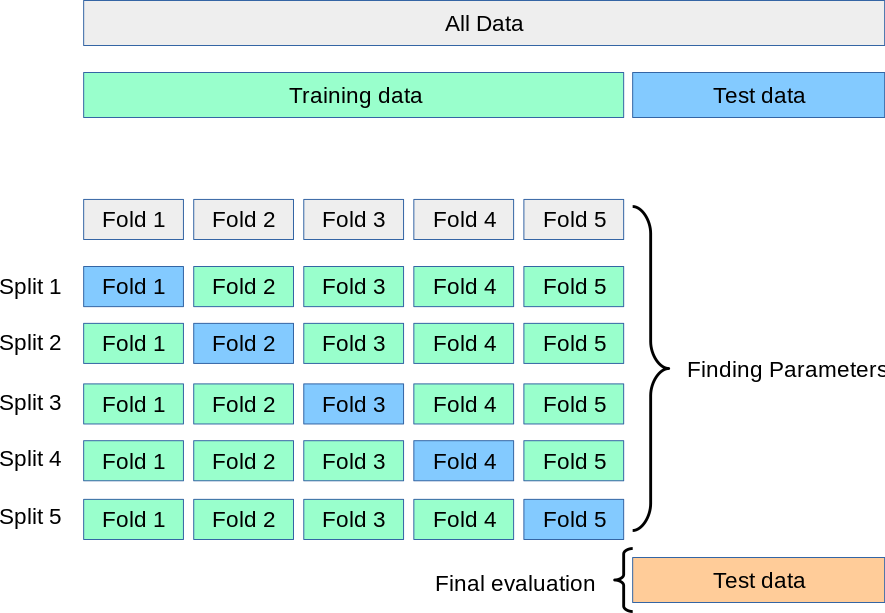
#### source: https://scikit-learn.org/stable/modules/cross_validation.html

In [105]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores (Logistic Model):", cross_val_scores)
print("Mean Cross-Validation Accuracy (Logistic Model):", cross_val_scores.mean())

Cross-Validation Accuracy Scores: [0.80979418 0.81121363 0.78992193 0.80894886 0.80610795]
Mean Cross-Validation Accuracy: 0.8051973111168463


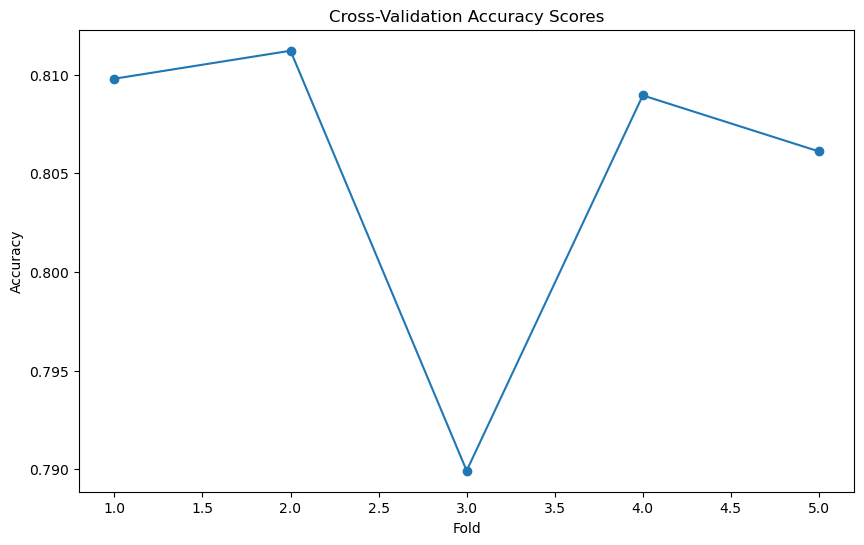

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cross_val_scores) + 1), cross_val_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores (Logistic Model)')
plt.show()

#### The result looks nice but let's try another method and compare both

In [109]:
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

In [111]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Convert regression predictions to binary classification
y_pred_lasso_class = [1 if prob > 0.5 else 0 for prob in y_pred_lasso]

In [112]:
print("Lasso Regression:")
print(confusion_matrix(y_test, y_pred_lasso_class))
print(classification_report(y_test, y_pred_lasso_class))

Lasso Regression:
[[955  81]
 [201 172]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



<Axes: >

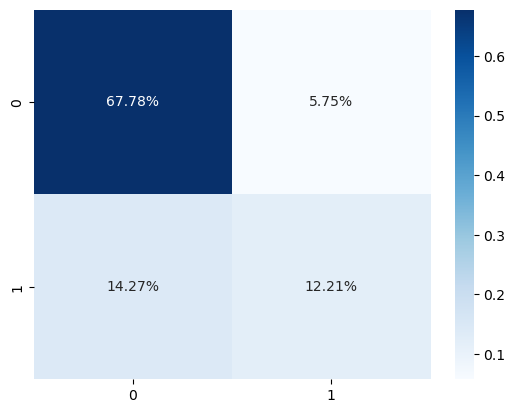

In [113]:
sns.heatmap(confusion_matrix(y_test, y_pred_lasso_class)/np.sum(confusion_matrix(y_test, y_pred_lasso_class)), annot=True, fmt='.2%', cmap='Blues')

### Observing the result numbers logistic model fits better for this dataset